In [1]:
from package_project import indicateurs_climat, preparation_data, cartes, indicateurs_tourisme
import pandas
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

data_1=pandas.read_csv("~/Project/Data/data_climat.csv")
data_2=pandas.read_csv("~/Project/Data/data_tourisme.csv")

df = preparation_data.merge_data(data_1, data_2)

df.DEP.count

<bound method Series.count of 0        1
1        1
2        1
3        1
4        1
        ..
9115    95
9116    95
9117    95
9118    95
9119    95
Name: DEP, Length: 9120, dtype: int64>

- la France est un pays avec une grande variabilité climatique sur le territoire

In [2]:
# parametres
mois_ete = [6, 7, 8, 9]
mois_hiver = [1,2,3,12]
toutes_annees = [i for i in range(2011, 2023)]


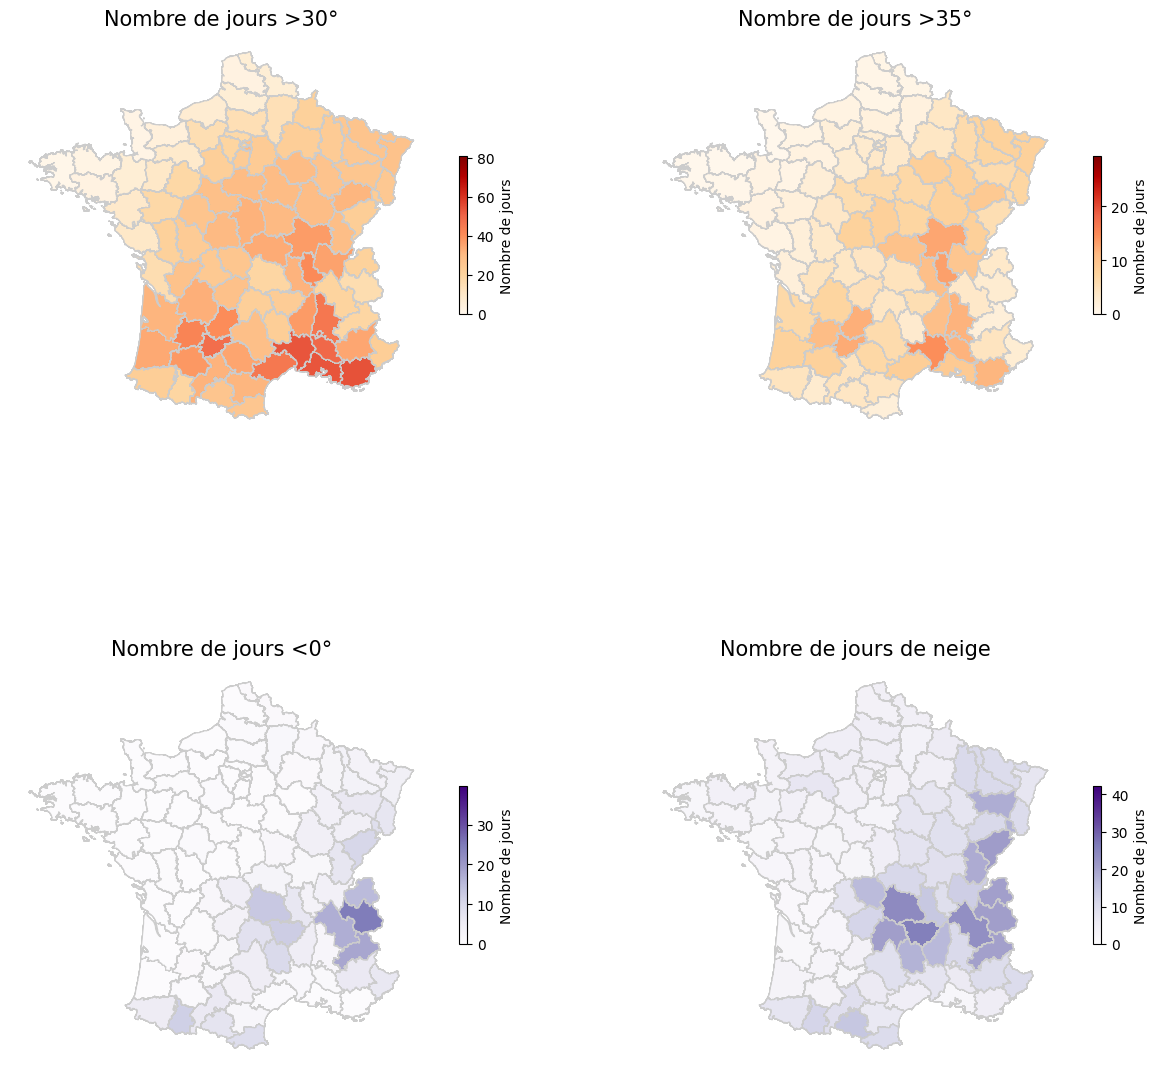

In [3]:

# construction des cartes 

fig, ax = plt.subplots(2,2, figsize=(15, 15))

# été : nombre de jours à plus de 30 degrés et 35 degrés  
cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_par_an(df, toutes_annees, mois_ete, "NBJTX30")),
            toutes_annees,
            mois_ete,
            "NBJTX30",
            "Nombre de jours >30°",
            ax[0,0],
            evolution = False)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_par_an(df, toutes_annees, mois_ete, "NBJTX35")),
            toutes_annees,
            mois_ete,
            "NBJTX35",
            "Nombre de jours >35°",
            ax[0,1],
            evolution = False)

# # hiver : nombre de jours à moins de 0° ou de neige  

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_par_an(df, toutes_annees, mois_hiver, "NBJTX0")),
            toutes_annees,
            mois_hiver,
            "NBJTX0",
            "Nombre de jours <0°",
            ax[1,0],
            evolution = False)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_par_an(df, toutes_annees, mois_hiver, "NBJNEIG")),
            toutes_annees,
            mois_hiver,
            "NBJNEIG",
            "Nombre de jours de neige",
            ax[1,1],
            evolution = False)



- tendance au réchauffement, marquée sur les années 2010

In [4]:
# GIF DE SORO

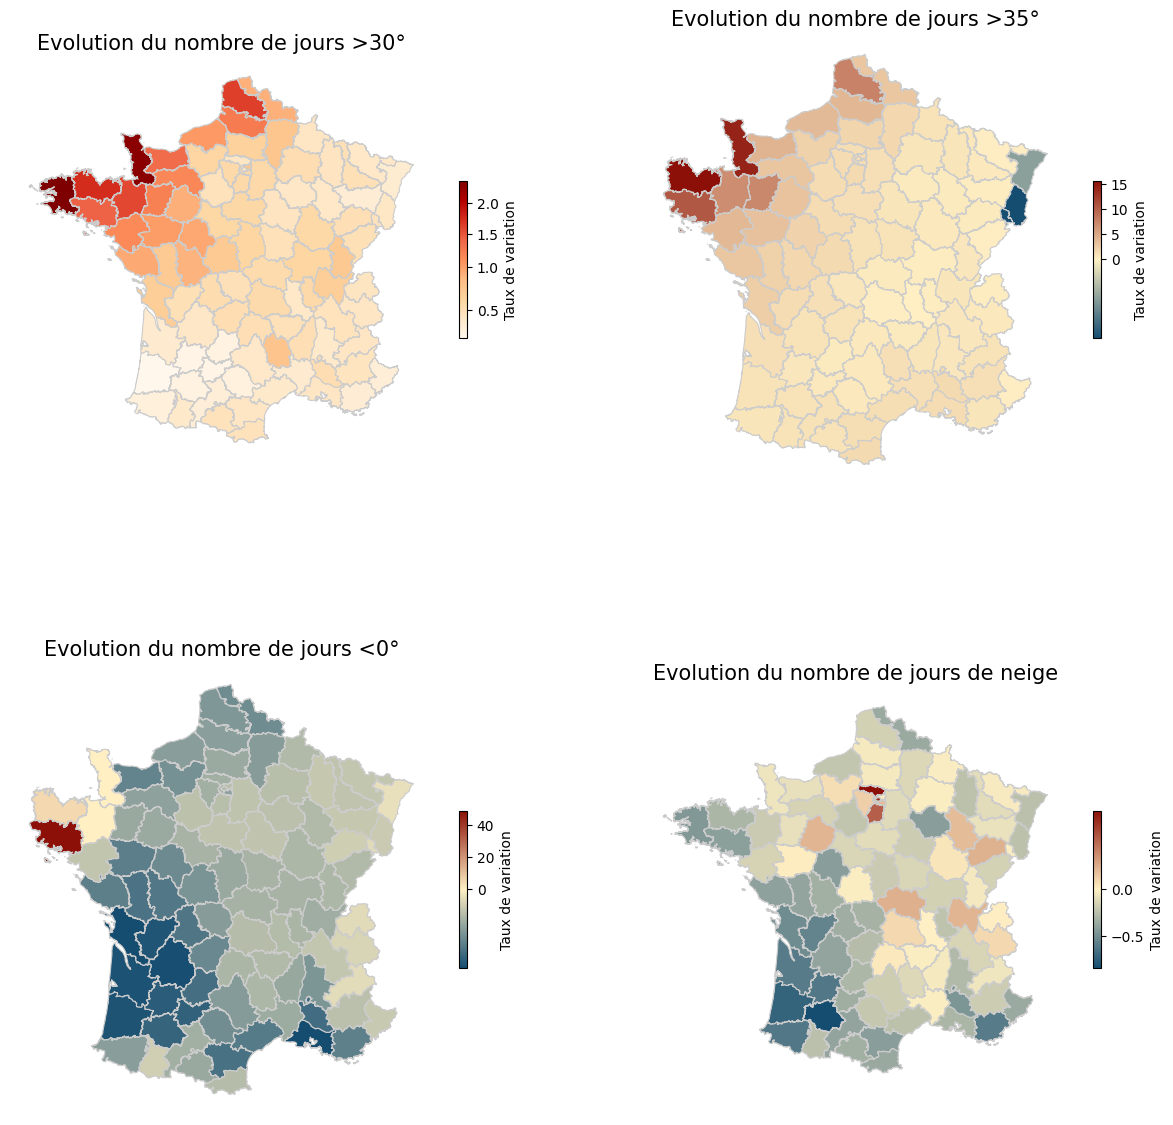

In [5]:
# évolution des évènements extremes 

fig, ax = plt.subplots(2,2, figsize=(15, 15))

# été : nombre de jours à plus de 30 degrés et 35 degrés  

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_evol_2015(df, "été", "NBJTX30")),
            toutes_annees,
            mois_ete,
            "NBJTX30",
            "Evolution du nombre de jours >30°",
            ax[0,0],
            evolution = True)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_evol_2015(df, "été", "NBJTX35")),
            toutes_annees,
            mois_ete,
            "NBJTX35",
            "Evolution du nombre de jours >35°",
            ax[0,1],
            evolution = True)

# # hiver : nombre de jours à moins de 0° ou de neige  

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_evol_2015(df, "hiver", "NBJTX0")),
            toutes_annees,
            mois_hiver,
            "NBJTX0",
            "Evolution du nombre de jours <0°",
            ax[1,0],
            evolution = True)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_evol_2015(df, "hiver", "NBJNEIG")),
            toutes_annees,
            mois_hiver,
            "NBJNEIG",
            "Evolution du nombre de jours de neige",
            ax[1,1],
            evolution = True)

- le tourisme est une activité qui dépend bcp du climat/météo

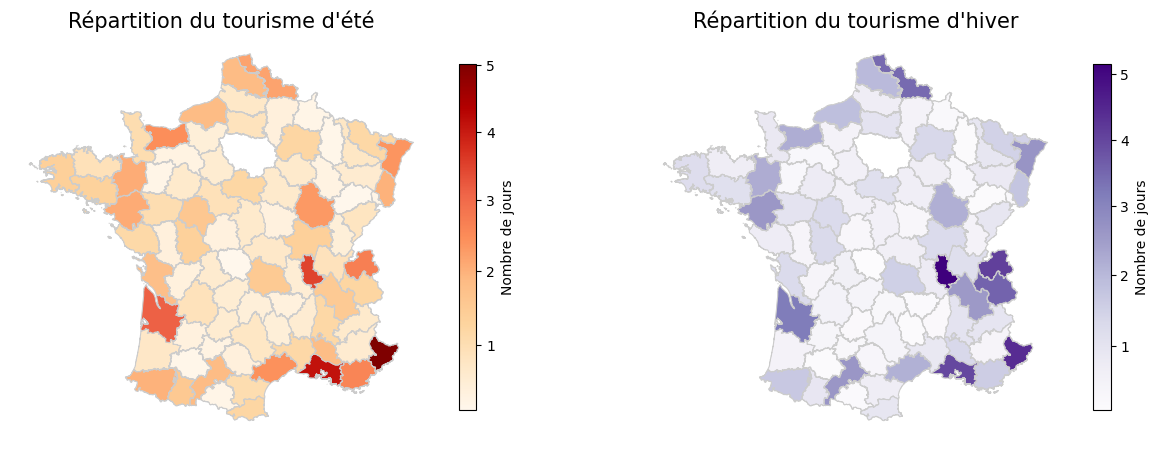

In [6]:
# tourisme 
mois_hiver = [1,2,3]
fig, ax = plt.subplots(1,2, figsize=(15, 15))

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.repartition_arrivees(df, toutes_annees, mois_ete, ["DEP"])),
            toutes_annees,
            mois_ete,
            "part_tourisme",
            "Répartition du tourisme d'été",
            ax[0],
            evolution = False)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.repartition_arrivees(df, toutes_annees, mois_hiver, ["DEP"])),
            toutes_annees,
            mois_hiver,
            "part_tourisme",
            "Répartition du tourisme d'hiver",
            ax[1],
            evolution = False)



In [7]:
annees = toutes_annees
mois=mois_ete
par_groupe=["DEP"]

data = pandas.DataFrame(df.loc[df['AAAA'].isin(annees)].loc[df['MM'].isin(mois)].loc[~df["DEP"].isin([75,77,78,91,92,93,94,95])].groupby(par_groupe)["OBS_VALUE_CORR"].sum())
print(data.head())
data = data.reset_index()
print(data.head())

# print(data.OBS_VALUE_CORR.sum())

data["part_tourisme"] = ((data.OBS_VALUE_CORR / data.OBS_VALUE_CORR.sum()))*100
print(data.head())


     OBS_VALUE_CORR
DEP                
1         3624560.0
2         1582290.0
3         2884280.0
4         2400170.0
5         2619390.0
   DEP  OBS_VALUE_CORR
0    1       3624560.0
1    2       1582290.0
2    3       2884280.0
3    4       2400170.0
4    5       2619390.0
   DEP  OBS_VALUE_CORR  part_tourisme
0    1       3624560.0       0.874880
1    2       1582290.0       0.381926
2    3       2884280.0       0.696195
3    4       2400170.0       0.579342
4    5       2619390.0       0.632257


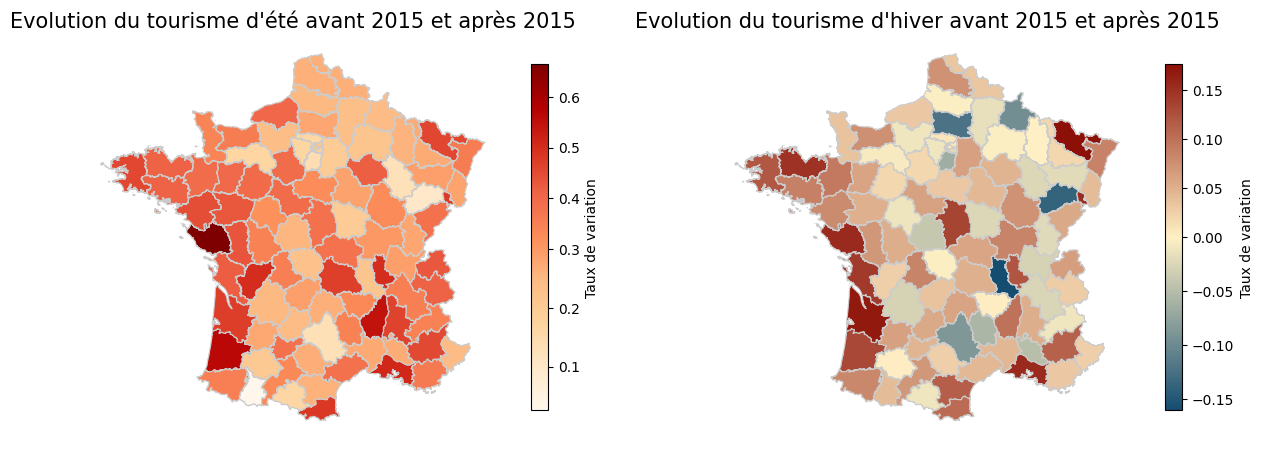

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.evol_arrivees(df, mois_ete)),
            toutes_annees,
            mois_ete,
            "evol_2015",
            "Evolution du tourisme d'été avant 2015 et après 2015",
            ax[0],
            evolution = True)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.evol_arrivees(df, mois_hiver)),
            toutes_annees,
            mois_hiver,
            "evol_2015",
            "Evolution du tourisme d'hiver avant 2015 et après 2015",
            ax[1],
            evolution = True)

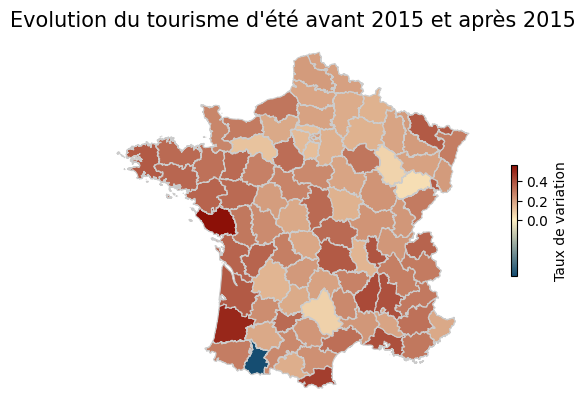

In [9]:
fig, ax = plt.subplots()

mois_ete=[6,9]

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.evol_arrivees(df, mois_ete)),
            toutes_annees,
            mois_ete,
            "evol_2015",
            "Evolution du tourisme d'été avant 2015 et après 2015",
            ax,
            evolution = True)